In [2]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.datasets import load_iris
iris = load_iris()
y1=iris.target
x1= iris.data

In [0]:
df = pd.DataFrame(x1,
                  columns = iris.feature_names)

In [0]:
x1

In [0]:
df['species']=y1


In [7]:
df['petal width (cm)'].unique().tolist()

[0.2,
 0.4,
 0.3,
 0.1,
 0.5,
 0.6,
 1.4,
 1.5,
 1.3,
 1.6,
 1.0,
 1.1,
 1.8,
 1.2,
 1.7,
 2.5,
 1.9,
 2.1,
 2.2,
 2.0,
 2.4,
 2.3]

In [8]:
def categorize(x):
    if x < 4:
        return 0
    elif x>=4 and x<=5.5:
        return 1
    else:
        return 2
def categorize2(x):
    if x < 5:
        return 0
    elif x>=5 and x<=6:
        return 1
    else:
        return 2
def categorize3(x):
    if x < 3:
        return 0
    elif x>=3 and x<=4:
        return 1
    else:
        return 2
def categorize4(x):
    if x < 1:
        return 0
    elif x>=1 and x<=2:
        return 1
    else:
        return 2
df['petal length cat']= 0
for i in range(150):
  df['petal length cat'][i]= categorize(df['petal length (cm)'][i])
df['petal width cat']= 0
for i in range(150):
  df['petal width cat'][i]= categorize4(df['petal width (cm)'][i])
df['sepal length cat']= 0
for i in range(150):
  df['sepal length cat'][i]= categorize2(df['sepal length (cm)'][i])
df['sepal width cat']= 0
for i in range(150):
  df['sepal width cat'][i]= categorize3(df['sepal width (cm)'][i])
df


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to b

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,petal length cat,petal width cat,sepal length cat,sepal width cat
0,5.1,3.5,1.4,0.2,0,0,0,1,1
1,4.9,3.0,1.4,0.2,0,0,0,0,1
2,4.7,3.2,1.3,0.2,0,0,0,0,1
3,4.6,3.1,1.5,0.2,0,0,0,0,1
4,5.0,3.6,1.4,0.2,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1,2,2,1
146,6.3,2.5,5.0,1.9,2,1,1,2,0
147,6.5,3.0,5.2,2.0,2,1,1,2,1
148,6.2,3.4,5.4,2.3,2,1,2,2,1


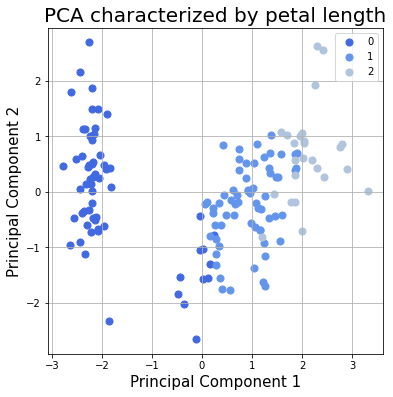

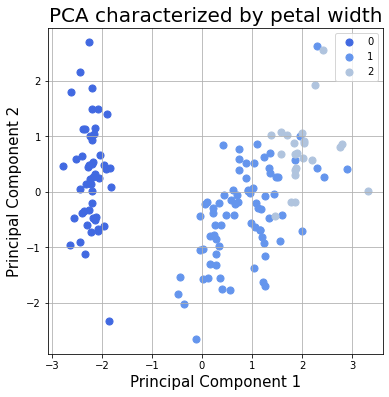

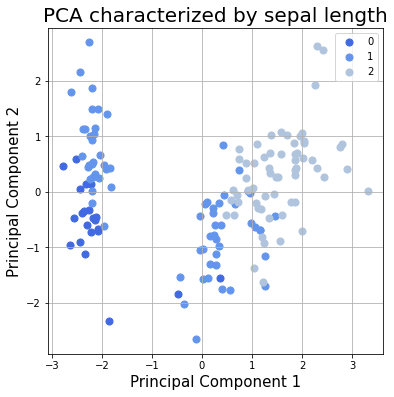

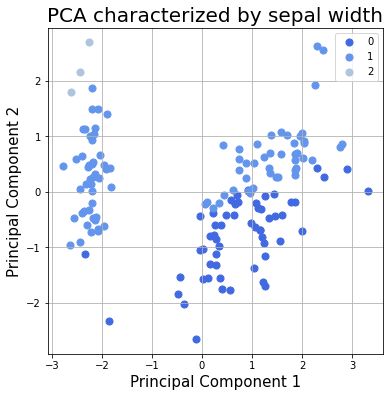

In [9]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
x = StandardScaler().fit_transform(x1)
#principal component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

for i in ['petal length cat','petal width cat','sepal length cat','sepal width cat']:
  finalDf = pd.concat([principalDf, df[[i]]], axis = 1)
  fig = plt.figure(figsize = (6,6))
  ax = fig.add_subplot(1,1,1) 
  ax.set_xlabel('Principal Component 1', fontsize = 15)
  ax.set_ylabel('Principal Component 2', fontsize = 15)
  ax.set_title('PCA characterized by {0}'.format(i[:-4]), fontsize = 20)
  targets = [0, 1, 2]
  colors = ['royalblue', 'cornflowerblue', 'lightsteelblue']
  for target, color in zip(targets,colors):
      indicesToKeep = finalDf[i] == target
      ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
  ax.legend(targets)
  ax.grid()
  



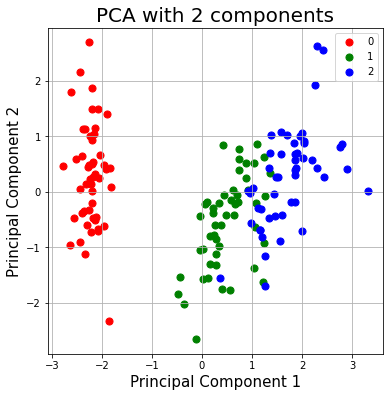

In [10]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
x = StandardScaler().fit_transform(x1)
#principal component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['species']]], axis = 1)
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA with 2 components', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Q2 part2


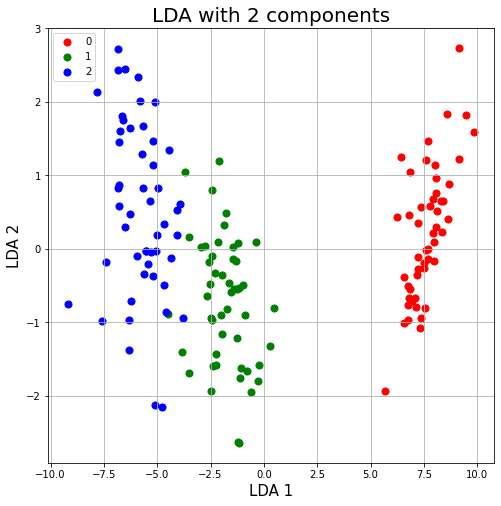

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
sklearn_lda = LDA(n_components=2)
x = StandardScaler().fit_transform(x1)
X_lda_sklearn = sklearn_lda.fit_transform(x, y1)

principalDf = pd.DataFrame(data = X_lda_sklearn
             , columns = ['LDA component 1', 'LDA component 2'])
finalDf = pd.concat([principalDf, df[['species']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('LDA 1', fontsize = 15)
ax.set_ylabel('LDA 2', fontsize = 15)
ax.set_title('LDA with 2 components', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'LDA component 1']
               , finalDf.loc[indicesToKeep, 'LDA component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


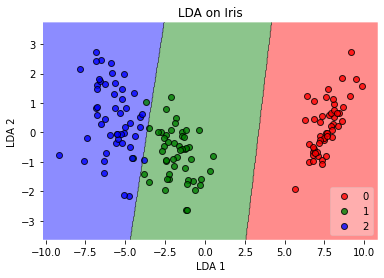

In [12]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
svm = SVC(C=0.5, kernel='linear')
svm.fit(X_lda_sklearn, y1)
plot_decision_regions(X_lda_sklearn, y1, clf=svm, legend=4,colors="r,g,b",markers="oooooo", )
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.title('LDA on Iris')
plt.show()

In [13]:
X_lda_sklearn

array([[ 8.06179978e+00,  3.00420621e-01],
       [ 7.12868772e+00, -7.86660426e-01],
       [ 7.48982797e+00, -2.65384488e-01],
       [ 6.81320057e+00, -6.70631068e-01],
       [ 8.13230933e+00,  5.14462530e-01],
       [ 7.70194674e+00,  1.46172097e+00],
       [ 7.21261762e+00,  3.55836209e-01],
       [ 7.60529355e+00, -1.16338380e-02],
       [ 6.56055159e+00, -1.01516362e+00],
       [ 7.34305989e+00, -9.47319209e-01],
       [ 8.39738652e+00,  6.47363392e-01],
       [ 7.21929685e+00, -1.09646389e-01],
       [ 7.32679599e+00, -1.07298943e+00],
       [ 7.57247066e+00, -8.05464137e-01],
       [ 9.84984300e+00,  1.58593698e+00],
       [ 9.15823890e+00,  2.73759647e+00],
       [ 8.58243141e+00,  1.83448945e+00],
       [ 7.78075375e+00,  5.84339407e-01],
       [ 8.07835876e+00,  9.68580703e-01],
       [ 8.02097451e+00,  1.14050366e+00],
       [ 7.49680227e+00, -1.88377220e-01],
       [ 7.58648117e+00,  1.20797032e+00],
       [ 8.68104293e+00,  8.77590154e-01],
       [ 6.

In [0]:
df_new = pd.DataFrame(x1,
                  columns = iris.feature_names)

In [15]:
df_new['species']=y1
df_1=df_new.loc[df['species']<2]
df_1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [0]:
abc=df_1.to_numpy()

In [17]:
y1[0:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [18]:
x1[0:49,:].shape

(49, 4)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


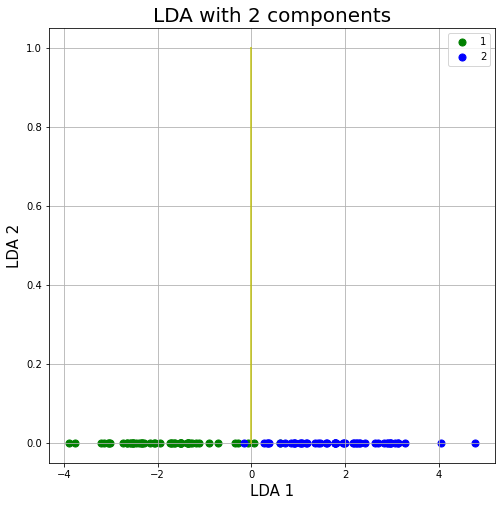

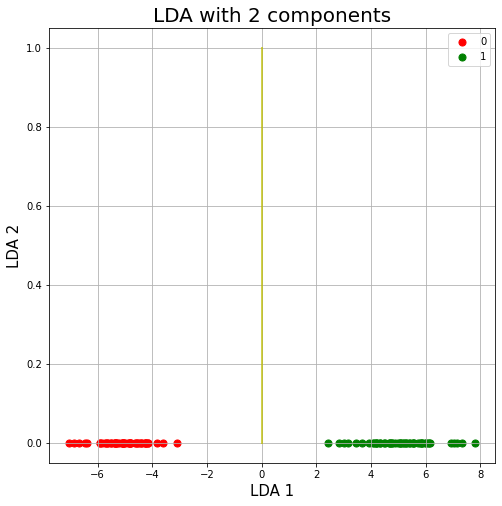

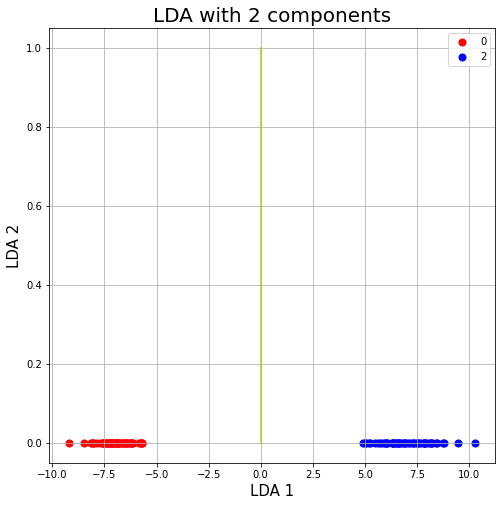

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as pp
import matplotlib.lines as lines 
def plot_at_y(arr, val, **kwargs):
    pp.plot(arr, np.zeros_like(arr) + val, 'o', **kwargs)
    pp.show()
#1,2
sklearn_lda = LDA(n_components=1)
x = StandardScaler().fit_transform(x1[50:150,:])
X_lda_sklearn = sklearn_lda.fit_transform(x, y1[50:150])
print(y1[50:150])
principalDf = pd.DataFrame(data = X_lda_sklearn
             , columns = ['LDA component 1'])
df_st= pd.DataFrame( y1[50:150] ,columns=['species'] )
finalDf = pd.concat([principalDf, df_st], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('LDA 1', fontsize = 15)
ax.set_ylabel('LDA 2', fontsize = 15)
ax.set_title('LDA with 2 components', fontsize = 20)
targets = [1, 2]
colors = ['g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'LDA component 1'],[[0] for i in range(50)]
               , c = color
               , s = 50)
ax.legend(targets,)
line = lines.Line2D([0 , 0 ], 
                    [0 , 1], 
                    lw = 2, color ='y', 
                    axes = ax, alpha = 0.7) 
  
ax.add_line(line) 

ax.grid()

#0,1
sklearn_lda = LDA(n_components=1)
x = StandardScaler().fit_transform(x1[0:100,:])
X_lda_sklearn = sklearn_lda.fit_transform(x, y1[0:100])
principalDf = pd.DataFrame(data = X_lda_sklearn
             , columns = ['LDA component 1'])
df_st= pd.DataFrame( y1[0:100] ,columns=['species'] )
finalDf = pd.concat([principalDf, df_st], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('LDA 1', fontsize = 15)
ax.set_ylabel('LDA 2', fontsize = 15)
ax.set_title('LDA with 2 components', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'LDA component 1'],[[0] for i in range(50)]
               , c = color
               , s = 50)
ax.legend(targets)
line = lines.Line2D([0 , 0 ], 
                    [0 , 1], 
                    lw = 2, color ='y', 
                    axes = ax, alpha = 0.7) 
  
ax.add_line(line)     

ax.grid()

#0,2
a= x1[0:50]
a=np.concatenate((a,x1[100:150]))
b= y1[0:50]
b = np.concatenate((b,y1[100:150]))
df_st= pd.DataFrame( b ,columns=['species'] )
sklearn_lda = LDA(n_components=1)
x = StandardScaler().fit_transform(a)
X_lda_sklearn = sklearn_lda.fit_transform(x, b)
principalDf = pd.DataFrame(data = X_lda_sklearn
             , columns = ['LDA component 1'])
finalDf = pd.concat([principalDf, df_st], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('LDA 1', fontsize = 15)
ax.set_ylabel('LDA 2', fontsize = 15)
ax.set_title('LDA with 2 components', fontsize = 20)
targets = [0, 2]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'LDA component 1'],[[0] for i in range(50)]
               , c = color
               , s = 50)
ax.legend(targets)
line = lines.Line2D([0 , 0 ], 
                    [0 , 1], 
                    lw = 2, color ='y', 
                    axes = ax, alpha = 0.7) 
  
ax.add_line(line) 

ax.grid()

Q2 part3

In [0]:
from sklearn.manifold import TSNE

Text(0.5, 1.0, 'metric=euclidean')

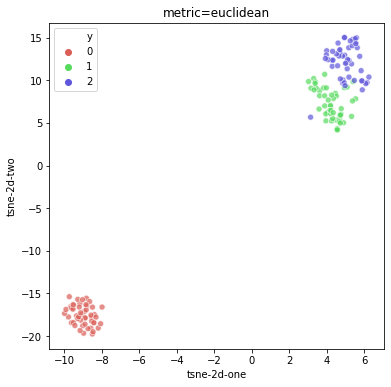

In [21]:
tsne=TSNE(n_components=2,perplexity=40,n_iter=1000).fit_transform(x1)
df_subset=pd.DataFrame(x1,columns=iris.feature_names)
df_subset['y']=y1
df_subset['tsne-2d-one'] = tsne[:,0]
df_subset['tsne-2d-two'] = tsne[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 3),
    data=df_subset,
    legend="full",
    alpha=0.7,
)
plt.title("metric=euclidean")

Text(0.5, 1.0, 'metric=minkowski(dist= ||u-v||p ie p norm)')

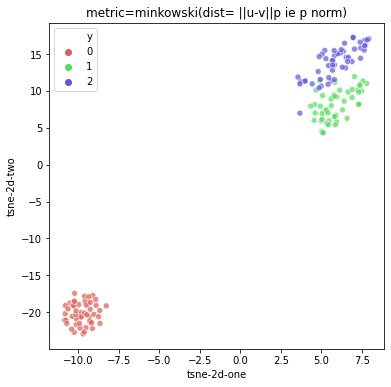

In [22]:
tsne=TSNE(n_components=2,perplexity=40,n_iter=1000,metric='minkowski').fit_transform(x1)
df_subset=pd.DataFrame(x1,columns=iris.feature_names)
df_subset['y']=y1
df_subset['tsne-2d-one'] = tsne[:,0]
df_subset['tsne-2d-two'] = tsne[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 3),
    data=df_subset,
    legend="full",
    alpha=0.7
)
plt.title("metric=minkowski(dist= ||u-v||p ie p norm)")

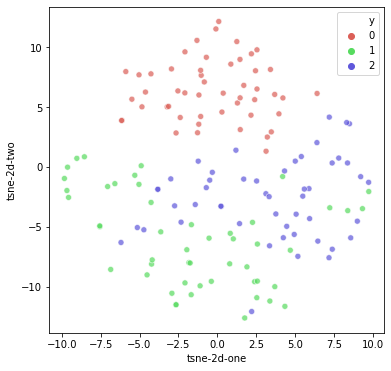

In [23]:
tsne=TSNE(n_components=2,perplexity=40,n_iter=1000,metric='hamming').fit_transform(x1)
df_subset=pd.DataFrame(x1,columns=iris.feature_names)
df_subset['y']=y1
df_subset['tsne-2d-one'] = tsne[:,0]
df_subset['tsne-2d-two'] = tsne[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 3),
    data=df_subset,
    legend="full",
    alpha=0.7
)


<Figure size 576x576 with 0 Axes>

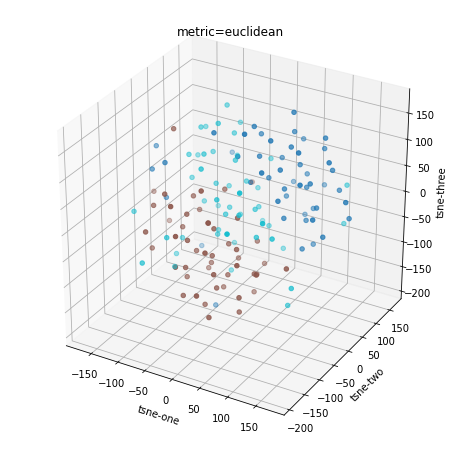

<Figure size 576x576 with 0 Axes>

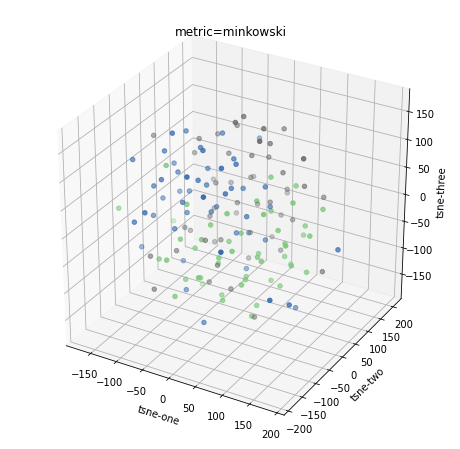

<Figure size 576x576 with 0 Axes>

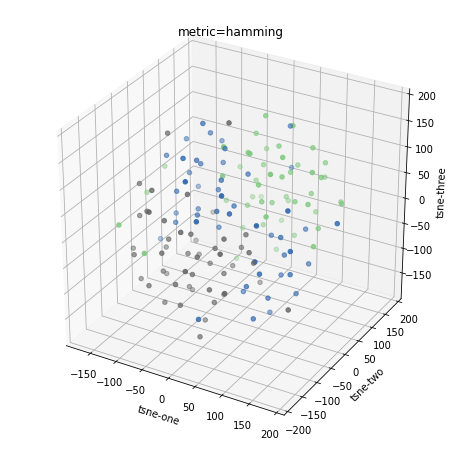

In [26]:
tsne=TSNE(n_components=3,perplexity=40,n_iter=1000).fit_transform(x1)
df_subset['tsne-2d-one'] = tsne[:,0]
df_subset['tsne-2d-two'] = tsne[:,1]
df_subset['tsne-2d-three'] = tsne[:,2]
plt.figure(figsize=(8,8))
ax = plt.figure(figsize=(8,8)).gca(projection='3d')
ax.scatter(
    xs=df_subset["tsne-2d-one"], 
    ys=df_subset["tsne-2d-two"], 
    zs=df_subset["tsne-2d-three"], 
    c=df_subset["y"], 
    cmap='tab10'
)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
plt.title("metric=euclidean")
plt.show()
tsne=TSNE(n_components=3,perplexity=40,n_iter=1000,metric='minkowski').fit_transform(x1)
df_subset['tsne-2d-one'] = tsne[:,0]
df_subset['tsne-2d-two'] = tsne[:,1]
df_subset['tsne-2d-three'] = tsne[:,2]
plt.figure(figsize=(8,8))
ax = plt.figure(figsize=(8,8)).gca( projection='3d' )
ax.scatter(
    xs=df_subset["tsne-2d-one"], 
    ys=df_subset["tsne-2d-two"], 
    zs=df_subset["tsne-2d-three"], 
    c=df_subset["y"], 
    cmap='Accent'
)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
plt.title("metric=minkowski")
plt.show()
tsne=TSNE(n_components=3,perplexity=40,n_iter=1000,metric='minkowski').fit_transform(x1)
df_subset['tsne-2d-one'] = tsne[:,0]
df_subset['tsne-2d-two'] = tsne[:,1]
df_subset['tsne-2d-three'] = tsne[:,2]
plt.figure(figsize=(8,8))
ax = plt.figure(figsize=(8,8)).gca( projection='3d' )
ax.scatter(
    xs=df_subset["tsne-2d-one"], 
    ys=df_subset["tsne-2d-two"], 
    zs=df_subset["tsne-2d-three"], 
    c=df_subset["y"], 
    cmap='Accent'
)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
plt.title("metric=hamming")
plt.show()